**bold text**
# Bank Term Deposit Classifier
**bold text**



# Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install --upgrade openpyxl
!pip install imblearn

In [ ]:
from google.colab import files
file = files.upload()  #uploading the file

Saving bank-additional-full.xlsx to bank-additional-full.xlsx


In [ ]:
df = pd.read_excel("bank-additional-full.xlsx") 
#df = pd.read_csv("bank-additional-full.csv") 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Processing

In [ ]:
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(41188, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 no

In [ ]:
df.dtypes #Datatype

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
age_group         float64
dtype: object

In [ ]:
df.describe() #Statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_group
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,34.964067
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,10.561766
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,20.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,30.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,30.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,40.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,60.000000


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,schooling,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30.0
3,40,admin.,married,schooling,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0


In [ ]:
print("Job:",df.job.value_counts(),sep = '\n') #Calculatig the count of each categorical variable  and their catregories in their respective column
print("-"*50)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*50)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*50)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*50)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*50)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*50)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*50)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*50)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*50)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*50)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')


Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------------------------------------
Education:
schooling              12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64
--------------------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--------------------------------------------------
Housing loan:
yes        21576
no         18622
unknown      990
Name: housing,

In [ ]:
print('Columns with null values:',df.isnull().sum(), sep = '\n')

Columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
age_group         0
dtype: int64


In [ ]:
#Grouping few education categories
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "schooling"

df['education'].value_counts()

schooling              12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
#Creating age groups

df.loc[df['age']<=30, 'age_group'] = 20
df.loc[df['age'].between(31,39), 'age_group'] = 30
df.loc[df['age'].between(40,49), 'age_group'] = 40
df.loc[df['age'].between(50,59), 'age_group'] = 50
df.loc[df['age']>=60, 'age_group'] = 60

df.head(n=15)

filtered_df=df.copy()

filtered_df= filtered_df.replace('unknown',np.nan)
filtered_df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,schooling,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30.0
3,40,admin.,married,schooling,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,60.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,40.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,50.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,40.0


In [ ]:
filtered_df= filtered_df.replace('unknown',np.nan)
filtered_df= filtered_df.replace(999,np.nan)
filtered_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,schooling,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30.0
3,40,admin.,married,schooling,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,60.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,40.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,50.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,40.0


In [ ]:
print('Columns with null values:',filtered_df.isnull().sum(), sep = '\n')
print(filtered_df.isnull().sum()/df.shape[0]*100) #Calculating Percentage of Null Values

Columns with null values:
age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
age_group             0
dtype: int64
age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.004856
campaign           0.000000
pdays             96.321744
previous           0.000000
poutcome           0.000000
emp.var.rate 

In [ ]:
filtered_df=filtered_df.drop(columns=['default','pdays']) #Dropping the  column as 20%  and 96% missing values


In [ ]:
#Imputing
df_missing = filtered_df.isna().sum()


df_missing_cols = df_missing[df_missing > 0]
df_missing_cols

index_cols = df_missing_cols.index
cols_list = list(index_cols)

filtered_df[cols_list] = filtered_df[cols_list].fillna(filtered_df.groupby('age_group')[cols_list].transform(lambda x: x.mode()[0]))

In [ ]:
filtered_df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,schooling,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30.0
3,40,admin.,married,schooling,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40.0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,60.0
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,40.0
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,50.0
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,40.0


# Visualization

In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(filtered_df, x="job", y="duration",width=800, height=400, color="y" ,color_discrete_sequence=["red", "green"])
fig.update_layout(
    title={
        'text': "Duration of Calls vs Type of Job",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},legend_title_text='Term Deposit')

In [ ]:
fig = px.box(filtered_df, x="age_group", y="duration" ,width=800, height=400,color="y" ,color_discrete_sequence=["red", "green"])
fig.update_layout(
    title={
        'text': "Duration of Calls vs Age Group",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},legend_title_text='Term Deposit')

In [ ]:
fig = px.box(filtered_df, x="marital", y="duration", color="y",width=800, height=400 ,color_discrete_sequence=["red", "green"])
fig.update_layout(
    title={
        'text': "Duration of Calls vs Marital Status",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},legend_title_text='Term Deposit')

In [ ]:
fig = px.box(filtered_df, x="marital", y="cons.price.idx", width=800, height=400,color="y" ,color_discrete_sequence=["red", "green"])
fig.update_layout(
    title={
        'text': "Consumer Price Index Marital status wise",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},legend_title_text='Term Deposit')

**Conclusion:**
There are very minute differences among the price index.

Married leads have considerably have an upper hand as they have index contributing as couple

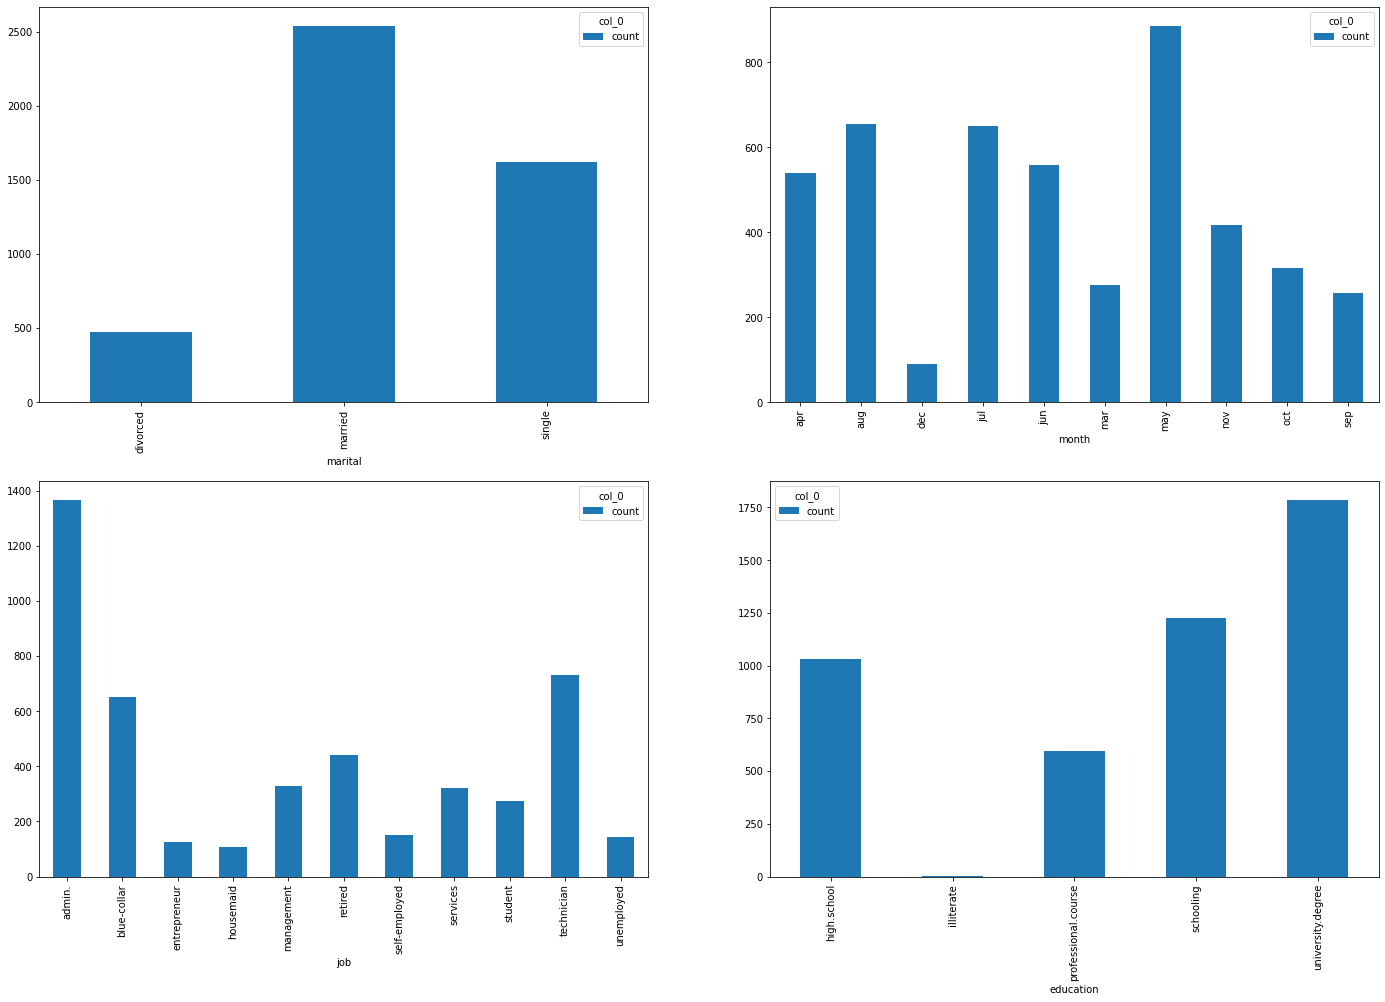

In [ ]:
import matplotlib.pyplot as plt
df_bank = filtered_df[filtered_df['y']=='yes']


df1 = pd.crosstab(index = df_bank ["marital"],columns="count")    
df2 = pd.crosstab(index = df_bank ["month"],columns="count")  
df3= pd.crosstab(index = df_bank ["job"],columns="count") 
df4=pd.crosstab(index = df_bank ["education"],columns="count")



fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(24,16))
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])   


In [ ]:
df1

col_0,count
marital,
divorced,476
married,2541
single,1623


In [ ]:
fig = px.scatter(filtered_df, x="campaign", y="duration", width=800, height=400,color="y")
fig.update_layout(
    title={
        'text': "Duration of Calls vs Campign",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},legend_title_text='Term Deposit')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

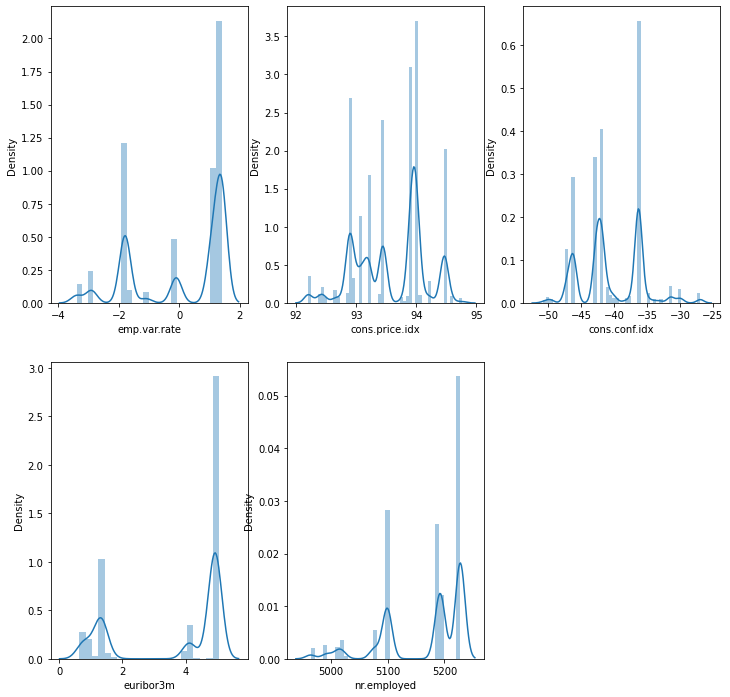

In [ ]:
plt.subplot(231)
sns.distplot(filtered_df['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.subplot(232)
sns.distplot(filtered_df['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.subplot(233)
sns.distplot(filtered_df['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.subplot(234)
sns.distplot(filtered_df['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.subplot(235)
sns.distplot(filtered_df['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(12,12)

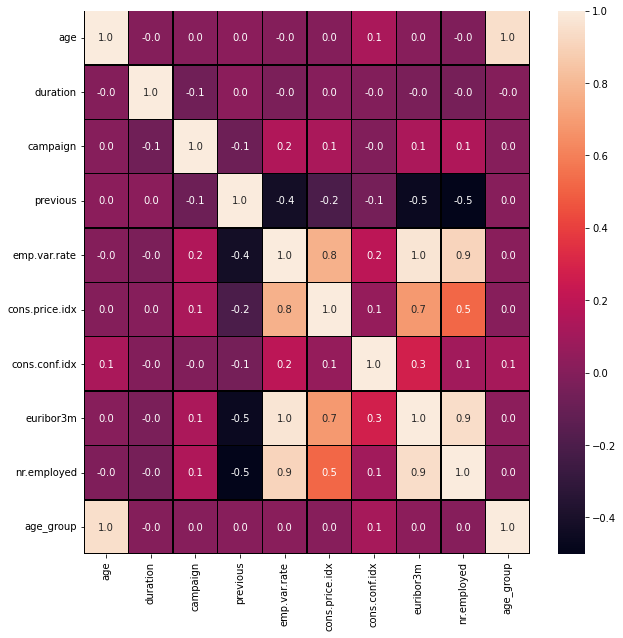

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(filtered_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [ ]:
filtered_df=filtered_df.drop(columns=['nr.employed'])

The nr.employed column was dropped as it is highly coorelated to two other columnsemp.var.rate and euibor3m

Text(0.5, 1.0, 'euribor3m')

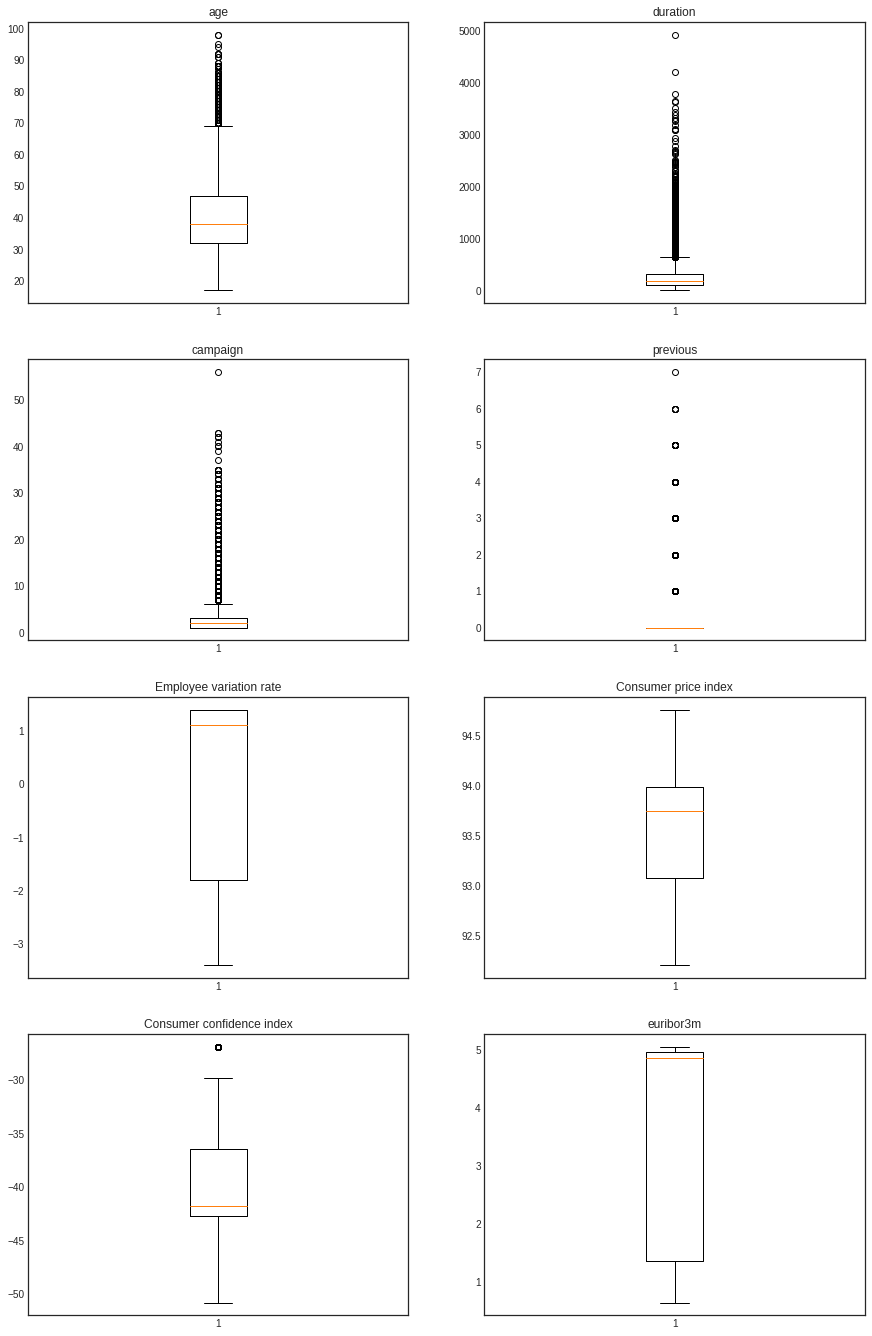

In [ ]:
#Boxplot to check the outliers
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(filtered_df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(filtered_df['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(filtered_df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(filtered_df['previous'])
ax.set_title('previous')
ax=plt.subplot(525)
plt.boxplot(filtered_df['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(526)
plt.boxplot(filtered_df['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(527)
plt.boxplot(filtered_df['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(528)
plt.boxplot(filtered_df['euribor3m'])
ax.set_title('euribor3m')



Text(0.5, 1.0, 'campaign')

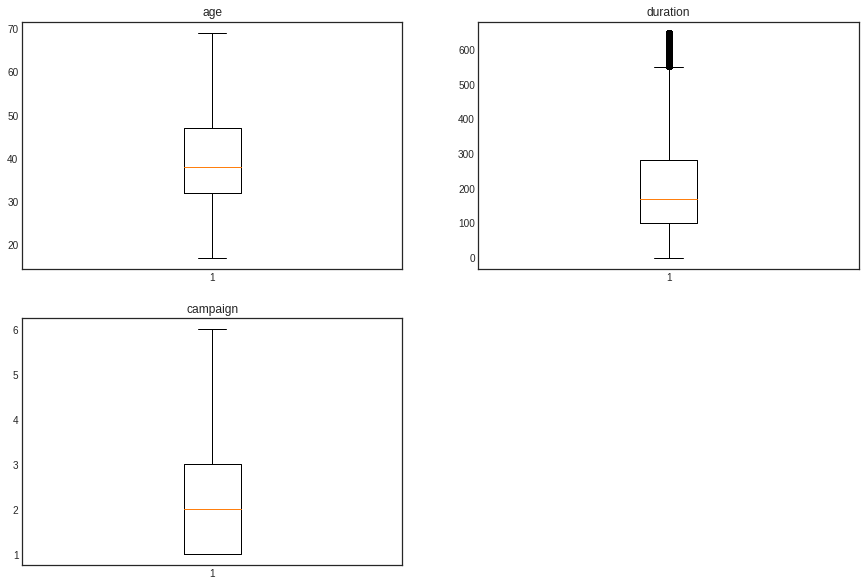

In [ ]:
#Handling the outliers
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = filtered_df[cols].quantile(0.25)
    Q3 = filtered_df[cols].quantile(0.75)
    IQR =Q3 - Q1     

    filter = (filtered_df[cols] >= Q1 - 1.5 * IQR) & (filtered_df[cols] <= Q3 + 1.5 *IQR)
    filtered_df=filtered_df.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(filtered_df['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(filtered_df['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(filtered_df['campaign'])
ax.set_title('campaign')

Text(0, 0.5, 'Campaign')

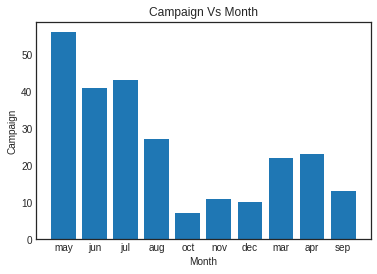

In [ ]:
plt.bar(df['month'], df['campaign'])
plt.title('Campaign Vs Month')
plt.xlabel('Month')
plt.ylabel('Campaign')

# Model Exploration

In [ ]:
bank_features=filtered_df.copy()
bank_features

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group
0,56,housemaid,married,schooling,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,30.0
3,40,admin.,married,schooling,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,40.0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,yes,no,cellular,nov,fri,281,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes,30.0
41182,29,unemployed,single,schooling,yes,no,cellular,nov,fri,112,1,1,success,-1.1,94.767,-50.8,1.028,no,20.0
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,no,40.0
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,no,50.0


In [ ]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict) 


In [ ]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [ ]:
dictionary={'yes':1,'no':0}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)
bank_features

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group
0,56,housemaid,married,schooling,0,0,telephone,5,2,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
1,57,services,married,high.school,0,0,telephone,5,2,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
2,37,services,married,high.school,1,0,telephone,5,2,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,30.0
3,40,admin.,married,schooling,0,0,telephone,5,2,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,40.0
4,56,services,married,high.school,0,1,telephone,5,2,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,1,0,cellular,11,6,281,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes,30.0
41182,29,unemployed,single,schooling,1,0,cellular,11,6,112,1,1,success,-1.1,94.767,-50.8,1.028,no,20.0
41184,46,blue-collar,married,professional.course,0,0,cellular,11,6,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,no,40.0
41185,56,retired,married,university.degree,1,0,cellular,11,6,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,no,50.0


In [ ]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [ ]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [ ]:
bank_features.loc[:,['job','education']].head()

,job,education
0,899,11572
1,3456,8288
2,3456,8288
3,9194,11572
4,3456,8288


In [ ]:
marital_dict={'single':1,'married':2 ,'divorced':3}
bank_features['marital']= bank_features['marital'].map(marital_dict) 


In [ ]:
bank_features

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group
0,56,899,2,11572,0,0,telephone,5,2,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
1,57,3456,2,8288,0,0,telephone,5,2,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
2,37,3456,2,8288,1,0,telephone,5,2,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,30.0
3,40,9194,2,11572,0,0,telephone,5,2,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,40.0
4,56,3456,2,8288,0,1,telephone,5,2,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,9194,2,11135,1,0,cellular,11,6,281,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes,30.0
41182,29,887,1,11572,1,0,cellular,11,6,112,1,1,success,-1.1,94.767,-50.8,1.028,no,20.0
41184,46,8254,2,4554,0,0,cellular,11,6,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,no,40.0
41185,56,1158,2,11135,1,0,cellular,11,6,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,no,50.0


In [ ]:
bank_features=bank_features.drop(columns=['age_group'])


In [ ]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [ ]:
dummy_contact

,dummy_telephone
0,1
1,1
2,1
3,1
4,1
...,...
41181,0
41182,0
41184,0
41185,0


In [ ]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
bank_features

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,dummy_telephone,dummy_nonexistent,dummy_success
0,56,899,2,11572,0,0,5,2,261,1,0,1.1,93.994,-36.4,4.857,no,1,1,0
1,57,3456,2,8288,0,0,5,2,149,1,0,1.1,93.994,-36.4,4.857,no,1,1,0
2,37,3456,2,8288,1,0,5,2,226,1,0,1.1,93.994,-36.4,4.857,no,1,1,0
3,40,9194,2,11572,0,0,5,2,151,1,0,1.1,93.994,-36.4,4.857,no,1,1,0
4,56,3456,2,8288,0,1,5,2,307,1,0,1.1,93.994,-36.4,4.857,no,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,9194,2,11135,1,0,11,6,281,1,0,-1.1,94.767,-50.8,1.028,yes,0,1,0
41182,29,887,1,11572,1,0,11,6,112,1,1,-1.1,94.767,-50.8,1.028,no,0,0,1
41184,46,8254,2,4554,0,0,11,6,383,1,0,-1.1,94.767,-50.8,1.028,no,0,1,0
41185,56,1158,2,11135,1,0,11,6,189,2,0,-1.1,94.767,-50.8,1.028,no,0,1,0


# Standardization

In [ ]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education',  'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [ ]:
scaled_data = pd.concat([bank_scale[['job', 'education','housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success' ,'marital']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,899,11572,0,0,5,2,no,1,1,0,2,1.694685,0.383483,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
1,3456,8288,0,0,5,2,no,1,1,0,2,1.798009,-0.413534,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
2,3456,8288,1,0,5,2,no,1,1,0,2,-0.268475,0.134415,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
3,9194,11572,0,0,5,2,no,1,1,0,2,0.041498,-0.399302,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
4,3456,8288,0,1,5,2,no,1,1,0,2,1.694685,0.710830,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686


In [ ]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
X

,job,education,housing,loan,month,day_of_week,dummy_telephone,dummy_nonexistent,dummy_success,marital,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,899,11572,0,0,5,2,1,1,0,2,1.694685,0.383483,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
1,3456,8288,0,0,5,2,1,1,0,2,1.798009,-0.413534,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
2,3456,8288,1,0,5,2,1,1,0,2,-0.268475,0.134415,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
3,9194,11572,0,0,5,2,1,1,0,2,0.041498,-0.399302,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
4,3456,8288,0,1,5,2,1,1,0,2,1.694685,0.710830,-0.813098,-0.354634,0.660509,0.741237,0.891989,0.720686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35558,9194,11135,1,0,11,6,0,1,0,2,-0.268475,0.525808,-0.813098,-0.354634,-0.743448,2.081135,-2.222501,-1.490874
35559,887,11572,1,0,11,6,0,0,1,1,-1.095069,-0.676834,-0.813098,1.672994,-0.743448,2.081135,-2.222501,-1.490874
35560,8254,4554,0,0,11,6,0,1,0,2,0.661443,1.251663,-0.813098,-0.354634,-0.743448,2.081135,-2.222501,-1.490874
35561,1158,11135,1,0,11,6,0,1,0,2,1.694685,-0.128885,-0.034462,-0.354634,-0.743448,2.081135,-2.222501,-1.490874


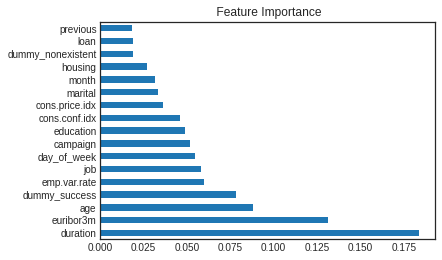

<Figure size 3240x720 with 0 Axes>

In [ ]:
#Feature selection
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.title (" Feature Importance")
plt.figure(figsize = (45, 10))
plt.show()


In [ ]:
X=scaled_data.drop(['dummy_telephone','previous','loan','month','housing','y'],axis=1)
y=scaled_data.y



In [ ]:
X

,job,education,day_of_week,dummy_nonexistent,dummy_success,marital,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,899,11572,2,1,0,2,1.694685,0.383483,-0.813098,0.660509,0.741237,0.891989,0.720686
1,3456,8288,2,1,0,2,1.798009,-0.413534,-0.813098,0.660509,0.741237,0.891989,0.720686
2,3456,8288,2,1,0,2,-0.268475,0.134415,-0.813098,0.660509,0.741237,0.891989,0.720686
3,9194,11572,2,1,0,2,0.041498,-0.399302,-0.813098,0.660509,0.741237,0.891989,0.720686
4,3456,8288,2,1,0,2,1.694685,0.710830,-0.813098,0.660509,0.741237,0.891989,0.720686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35558,9194,11135,6,1,0,2,-0.268475,0.525808,-0.813098,-0.743448,2.081135,-2.222501,-1.490874
35559,887,11572,6,0,1,1,-1.095069,-0.676834,-0.813098,-0.743448,2.081135,-2.222501,-1.490874
35560,8254,4554,6,1,0,2,0.661443,1.251663,-0.813098,-0.743448,2.081135,-2.222501,-1.490874
35561,1158,11135,6,1,0,2,1.694685,-0.128885,-0.034462,-0.743448,2.081135,-2.222501,-1.490874


#Model Exploration

In [ ]:
a1=X
b1=y

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority") # oversampling
X_res, y_res = ros.fit_resample(a1, b1)

X_res.shape[0] - a1.shape[0]

29791

In [ ]:
#Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (52283, 13)
Input Test: (13071, 13)
Output Training: (52283,)
Output Test: (13071,)


In [ ]:
#Training the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=BernoulliNB()
gb_cv=GradientBoostingClassifier()
rf_cv=RandomForestClassifier()
dc_cv=DecisionTreeClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes',4:'GradientBoosting',5:'RandomForestClassifier'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv,gb_cv,rf_cv]


for i,model in enumerate(cv_models):
    print("{} Train Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, cv=5, scoring ='accuracy').mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Train Accuracy: 0.8449783512455534
Decision Tree Train Accuracy: 0.9723619403511989
KNN Train Accuracy: 0.9302258972310475
Naive Bayes Train Accuracy: 0.785551763007453
GradientBoosting Train Accuracy: 0.8988390537150025
RandomForestClassifier Train Accuracy: 0.975804734717518


# Logistic Regression

In [ ]:
#Hyper Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

LogisticRegression(C=0.08685113737513521, random_state=0)
The mean accuracy of the model is: 0.8483666131129982


In [ ]:
#Best Model
logreg = LogisticRegression(C=0.3906939937054613, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 84.58


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)*100))

Accuracy of logistic regression classifier on train set: 84.28


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)


Confusion Matrix:
 [[5488 1140]
 [ 862 5581]]


In [ ]:
from sklearn.metrics import classification_report

report_logisitc = classification_report(y_test, y_pred)


print(report_logisitc)

              precision    recall  f1-score   support

          no       0.86      0.83      0.85      6628
         yes       0.83      0.87      0.85      6443

    accuracy                           0.85     13071
   macro avg       0.85      0.85      0.85     13071
weighted avg       0.85      0.85      0.85     13071



In [ ]:
ss=pd.DataFrame(y_pred)
ss.replace(('yes', 'no'), (1, 0), inplace=True)

pp=pd.DataFrame(y_test)
pp.replace(('yes', 'no'), (1, 0), inplace=True)

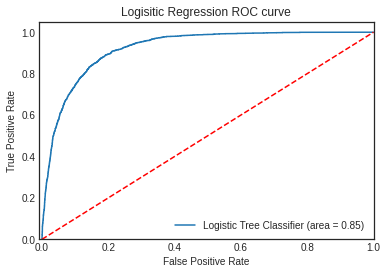

In [ ]:
from sklearn import metrics


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logistic_roc_auc = roc_auc_score(y_test,ss)
fpr, tpr, thresholds = roc_curve(pp, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Tree Classifier (area = %0.2f)' % Logistic_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logisitic Regression ROC curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
recall_specificity = metrics.recall_score(ss, pp, pos_label=1)
recall_sensitivity = metrics.recall_score(ss, pp, pos_label=0)
print(recall_sensitivity) #Class of interest - Yes
print(recall_specificity)

0.864251968503937
0.830382383573873


# Gradient Boosting

In [ ]:
#Hyper Tuning
param_grid = {
    #"loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(1, 8, 8),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "max_depth":[3,5,8],
    #"max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[50, 100, 120, 150]
    }
clf1 = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model_z = clf1.fit(X_train,y_train)
print(best_model_z.best_estimator_)
print("The mean accuracy of the model is:",best_model_z.score(X_test,y_test))

In [ ]:
gb_cv.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Best Parameters
gradientBoostingModel=GradientBoostingClassifier(learning_rate= 0.1,
 max_depth= 3,
 min_samples_leaf=1,
 min_samples_split= 2,
 n_estimators =100)


In [ ]:
gradientBoostingModel.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:

print("The mean accuracy of the model is:",gradientBoostingModel.score(X_test,y_test))
y_pred = gradientBoostingModel.predict(X_test)

print('Accuracy of Gradient on test set: {:.2f}'.format(gradientBoostingModel.score(X_test, y_test)*100))

The mean accuracy of the model is: 0.9006196924489328
Accuracy of Gradient on test set: 90.06


In [ ]:
print('Accuracy of Gradient Booster classifier on train set: {:.2f}'.format(gradientBoostingModel.score(X_train, y_train)*100))

Accuracy of Gradient Booster classifier on train set: 89.99


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[5672  956]
 [ 383 6060]]


In [ ]:
from sklearn.metrics import classification_report

report_GB = classification_report(y_test,y_pred)


print(report_GB)

              precision    recall  f1-score   support

          no       0.94      0.86      0.89      6628
         yes       0.86      0.94      0.90      6443

    accuracy                           0.90     13071
   macro avg       0.90      0.90      0.90     13071
weighted avg       0.90      0.90      0.90     13071



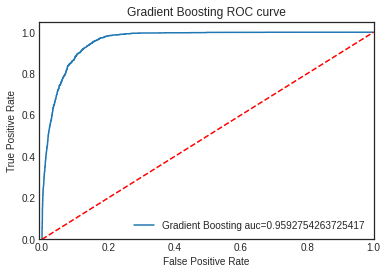

In [ ]:
from sklearn import metrics
pp=pd.DataFrame(y_test)
pp.replace(('yes', 'no'), (1, 0), inplace=True)

y_pred_proba = gradientBoostingModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(pp,  y_pred_proba)
auc = metrics.roc_auc_score(pp, y_pred_proba)
plt.plot(fpr,tpr,label="Gradient Boosting auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Gradient Boosting ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
ss=pd.DataFrame(y_pred)
ss.replace(('yes', 'no'), (1, 0), inplace=True)

In [ ]:
recall_specificity = metrics.recall_score(ss, pp, pos_label=1)
recall_sensitivity = metrics.recall_score(ss, pp, pos_label=0)
print(recall_sensitivity) #Class of interest - Yes
print(recall_specificity)

0.936746490503716
0.863740022805017


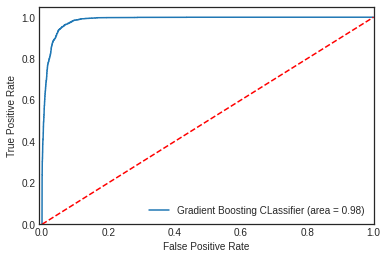

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Gradient_roc_auc = roc_auc_score(y_test,ss)
fpr, tpr, thresholds = roc_curve(ss, gradientBoostingModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting CLassifier (area = %0.2f)' % Gradient_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# KNN


In [ ]:
#Hyper Tuning
knn_cv=KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
clf_knn= GridSearchCV(knn_cv, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  


In [ ]:
grid_search=clf_knn.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 1}


**Note:**Not training the model with 'n_neighbors': 1 as on trainining and testing we get to know that model is overfitting


In [ ]:

pp=pd.DataFrame(y_pred)
pp.replace(('yes', 'no'),(1, 0),inplace=True)

In [ ]:
#Best Model
knn_cv_model=KNeighborsClassifier(n_neighbors=4)
knn_cv_model.fit(X_train,y_train)

print("The mean accuracy of the model is:",knn_cv_model.score(X_test,y_test))
y_pred = knn_cv_model.predict(X_test)

print('Accuracy of KNN on test set: {:.2f}'.format(knn_cv_model.score(X_test, y_test)))

The mean accuracy of the model is: 0.9534848137097391
Accuracy of KNN on test set: 0.95


In [ ]:
knn_cv_model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=4)>

In [ ]:
print('Accuracy of KNN on train set: {:.2f}'.format(knn_cv_model.score(X_train, y_train)*100))

Accuracy of KNN on train set: 97.33


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:

confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[6033  595]
 [  15 6428]]


In [ ]:
from sklearn.metrics import classification_report

report_KNN = classification_report(y_test,y_pred)


print(report_KNN)

              precision    recall  f1-score   support

          no       1.00      0.91      0.95      6628
         yes       0.92      1.00      0.95      6443

    accuracy                           0.95     13071
   macro avg       0.96      0.95      0.95     13071
weighted avg       0.96      0.95      0.95     13071



No handles with labels found to put in legend.


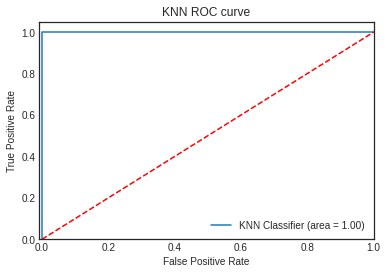

In [ ]:
from sklearn import metrics


y_pred_proba = knn_cv_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(pp,  y_pred_proba)
KNN_auc = metrics.roc_auc_score(pp, y_pred_proba)

plt.legend(loc=4)
plt.plot(fpr, tpr, label='KNN Classifier (area = %0.2f)' % KNN_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("KNN ROC curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
ss=pd.DataFrame(y_pred)
ss.replace(('yes', 'no'), (1, 0), inplace=True)

pp=pd.DataFrame(y_test)
pp.replace(('yes', 'no'), (1, 0), inplace=True)

In [ ]:
recall_specificity = metrics.recall_score(ss, pp, pos_label=1)
recall_sensitivity = metrics.recall_score(ss, pp, pos_label=0)
print(recall_sensitivity) #Class of interest - Yes
print(recall_specificity)

0.9975198412698413
0.9152783710664958


# Random Forest


In [ ]:
#Hyper Tuning
#Grid Search for RF
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#param_grid = {
#    'n_estimators': [200,500],
#    'max_features': [.5,.7],
#    'bootstrap': [False, True],
#    'max_depth':[3,6]
#}

clf_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid,cv=3, verbose=0,n_jobs=-1)
best_model_rf = clf_rf.fit(X_train,y_train)
print(best_model_rf.best_estimator_)
print("The mean accuracy of the model is:",best_model_rf.score(X_test,y_test))

In [ ]:
#Best Model
rf_model = RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=0)
rf_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=0)

In [ ]:
print("The mean accuracy of the model is:",rf_model.score(X_test,y_test))
y_pred = rf_model.predict(X_test)

print('Accuracy of Gradient on test set: {:.2f}'.format(rf_model.score(X_test, y_test)*100))

The mean accuracy of the model is: 0.9648075893198684
Accuracy of Gradient on test set: 96.48


In [ ]:
print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rf_model.score(X_train, y_train)*100))

Accuracy of Random Forest classifier on train set: 98.06


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[6174  454]
 [   0 6443]]


In [ ]:
report_rf = classification_report(y_test, y_pred)


print(report_rf)

              precision    recall  f1-score   support

          no       1.00      0.93      0.96      6628
         yes       0.94      1.00      0.97      6443

    accuracy                           0.97     13071
   macro avg       0.97      0.97      0.97     13071
weighted avg       0.97      0.97      0.97     13071



In [ ]:
ss=pd.DataFrame(y_pred)
ss.replace(('yes', 'no'), (1, 0), inplace=True)

pp=pd.DataFrame(y_test)
pp.replace(('yes', 'no'), (1, 0), inplace=True)

In [ ]:
recall_sensitivity = metrics.recall_score(ss, pp, pos_label=0)
recall_specificity = metrics.recall_score(ss, pp, pos_label=1)
print(recall_sensitivity) #Class of interest - Yes
print(recall_specificity)

0.9988691437802908
0.9353291672721988


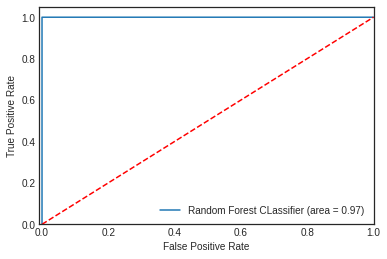

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test,ss)
fpr, tpr, thresholds = roc_curve(ss, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest CLassifier (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [ ]:
#Hyper Tuning
param_grid = {

    'max_depth': range(25, 45),

    'max_features': range(2, 11)}



clf_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid,cv=3, verbose=0,n_jobs=-1)

best_model_dt = clf_dt.fit(X_train,y_train)

print(best_model_dt.best_estimator_)

print("The mean accuracy of the model is:",best_model_dt.score(X_test,y_test))

DecisionTreeClassifier(max_depth=27, max_features=7, random_state=0)
The mean accuracy of the model is: 0.9759008492081708


In [ ]:
#Best Model
dt_cv=DecisionTreeClassifier(max_depth=28, max_features=6, random_state=0)
dt_cv.fit(X_train,y_train)

print("The mean accuracy of the model is:",dt_cv.score(X_test,y_test))
y_pred = dt_cv.predict(X_test)

print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dt_cv.score(X_test, y_test)))

The mean accuracy of the model is: 0.9764363858924336
Accuracy of Decision Tree Classifier on test set: 0.98


In [ ]:
print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(dt_cv.score(X_train, y_train)*100))

Accuracy of Decision Tree classifier on train set: 99.98


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[6326  302]
 [   0 6443]]


In [ ]:
from sklearn.metrics import classification_report

report_decision_tree = classification_report(y_test, y_pred)


print(report_decision_tree)

              precision    recall  f1-score   support

          no       1.00      0.95      0.98      6628
         yes       0.96      1.00      0.98      6443

    accuracy                           0.98     13071
   macro avg       0.98      0.98      0.98     13071
weighted avg       0.98      0.98      0.98     13071



In [ ]:
ss=pd.DataFrame(y_pred)
ss.replace(('yes', 'no'), (1, 0), inplace=True)



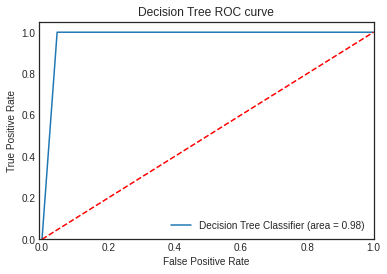

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(pp, dt_cv.predict_proba(X_test)[:,1])
Decision_roc_auc = roc_auc_score(y_test,dt_cv.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % Decision_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree ROC curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
recall_specificity = metrics.recall_score(ss, pp, pos_label=1)
recall_sensitivity = metrics.recall_score(ss, pp, pos_label=0)
print(recall_sensitivity) #Class of interest - Yes
print(recall_specificity)

1.0
0.9552260934025204


In [ ]:
#best_model_data = [['Logistic Regression',84.83],['Gradient Boosting',89.76],['KNN',95.5],['Random Forest',96.53],['Decision Tree',97.59]]
#final_model = pd.DataFrame(best_model_data, columns = ['Model','Accuracy (in%)'])

#final_model = pd.DataFrame(
#    {"Accuracy (in%)": [84.83, 89.76, 95.5, 96.53, 97.59]},
#    index = ['Logistic Regression','Gradient Boosting','KNN','Random Forest','Decision Tree'])
#final_model.plot.bar()

#final_model['Accuracy (in%)'].plot(kind="barh")
#plt.title("Accuracy of Models")
#plt.ylabel("Accuracy")
#plt.xlabel("Models")

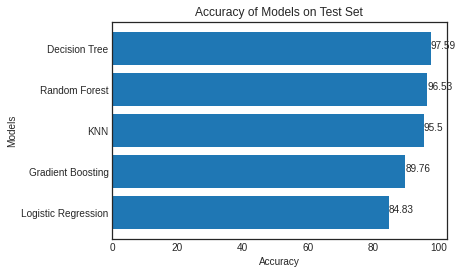

<Figure size 72000x14400 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
x = ['Logistic Regression','Gradient Boosting','KNN','Random Forest','Decision Tree']
y = [84.83, 89.76, 95.5, 96.53, 97.59]
plt.barh(x, y)

for index, value in enumerate(y):
	plt.text(value, index,
			str(value))
plt.title("Accuracy of Models on Test Set")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.figure(figsize = (1000, 200))
plt.show()
